In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("latimes-county-totals.csv")

In [6]:
df_la = df[df['county'] == 'Los Angeles']

In [7]:
df_la = df_la.drop(['fips','county','date'], axis=1)


In [8]:
days = list(range(1,len(df_la)+1))
df_la['culm_day'] = days
df_la

,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
867,1,0,NaN,NaN,1
868,1,0,0.0,0.0,2
869,1,0,0.0,0.0,3
870,1,0,0.0,0.0,4
871,1,0,0.0,0.0,5
...,...,...,...,...,...
962,23233,1119,711.0,54.0,96
963,24262,1174,1029.0,55.0,97
964,24936,1212,674.0,38.0,98
965,25699,1231,763.0,19.0,99


In [9]:
df_la = df_la.fillna(0)
df_la.describe()

,confirmed_cases,deaths,new_confirmed_cases,new_deaths,culm_day
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4806.740000,200.350000,262.370000,12.600000,50.500000
std,7579.479313,356.384181,369.692273,19.530344,29.011492
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,25.750000
50%,81.500000,1.000000,20.000000,0.000000,50.500000
75%,8101.250000,229.750000,474.500000,20.750000,75.250000
max,26238.000000,1260.000000,1505.000000,76.000000,100.000000


In [10]:
X = df_la.drop(['deaths'], axis=1)
y = df_la['deaths']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [13]:
## use curve_fit to autmatically find the best value for parameters a,b,c
#Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized

In [14]:
fit = curve_fit(logistic_model,X_train['culm_day'],y_train)

In [15]:
# result = logistic_model(df_la['culm_day'],7.31697654,88.32733981,1508.02969956)
result = logistic_model(X_test['culm_day'],6.8189002,86.50055711,1343.22053932)

In [16]:
mean_squared_error(y_test, result)

214.04819136606235

In [17]:
rms = np.sqrt(mean_squared_error(y_test, result))
rms

14.630385892588833

In [18]:
##create extra 100 days to see the data
days = list(range(92,105))
new_culm = pd.DataFrame(days)

In [19]:
## predcit death for the extra 100 days
result_new_culm = logistic_model(new_culm,7.31697654,88.32733981,1508.02969956)

<Figure size 432x288 with 0 Axes>

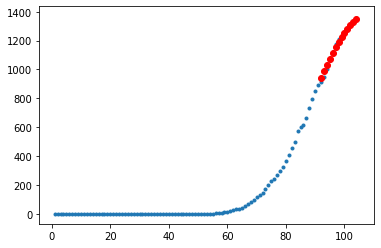

In [20]:
plt.clf()
fit = plt.figure()
# plot x = day, y = actual death
plt.scatter(x=df_la['culm_day'] , y = y, marker = '.' )

#plot for the extra 100 days
plt.scatter(x=days, y = result_new_culm, color = 'red' )